In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [4]:
## Read file

data_main = pd.read_csv("winequality-red.csv")
data_main.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

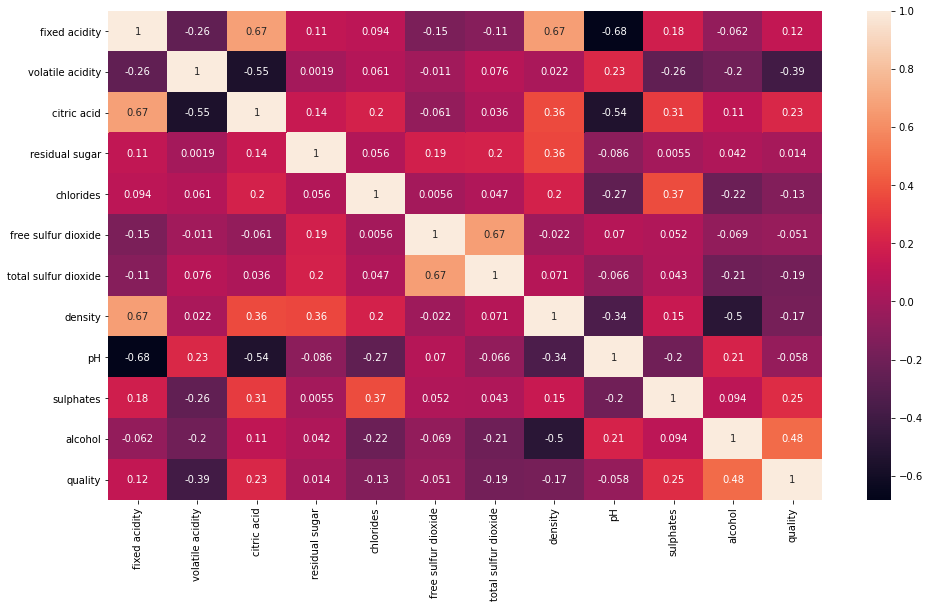

In [5]:
plt.figure(figsize=(16,9))
sns.heatmap(data_main.corr(method='pearson'), annot=True)

In [7]:
features = data_main.drop('quality', axis=1)
labels = data_main['quality']

In [8]:
features.select_dtypes(exclude=['int64']).columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
features_onehot

,fixed acidity_4.6,fixed acidity_4.7,fixed acidity_4.9,fixed acidity_5.0,fixed acidity_5.1,fixed acidity_5.2,fixed acidity_5.3,fixed acidity_5.4,fixed acidity_5.5,fixed acidity_5.6,...,alcohol_13.0,alcohol_13.1,alcohol_13.2,alcohol_13.3,alcohol_13.4,alcohol_13.5,alcohol_13.566666666666698,alcohol_13.6,alcohol_14.0,alcohol_14.9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X = features
y = labels

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [24]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.5833333333333334
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.12      0.10        17
           5       0.70      0.66      0.68       195
           6       0.60      0.60      0.60       200
           7       0.43      0.46      0.44        61
           8       0.25      0.17      0.20         6

    accuracy                           0.58       480
   macro avg       0.34      0.33      0.34       480
weighted avg       0.59      0.58      0.59       480



In [25]:
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

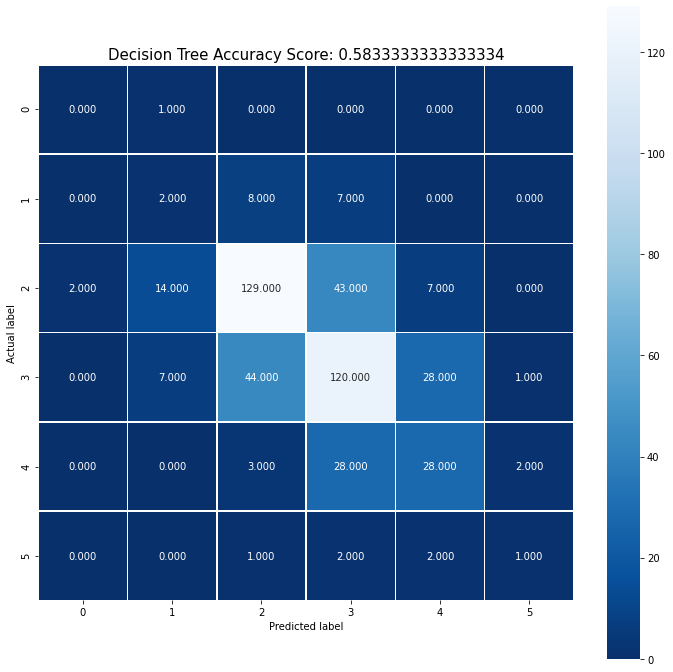

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Decision Tree Accuracy Score: {0}".format(tree_score);
plt.title(title, size = 15);

In [27]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train decision tree classifier
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [28]:
tree_pred = clf.predict(X_test)
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

Accuracy: 0.5625
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.07      0.06      0.06        17
           5       0.64      0.62      0.63       195
           6       0.57      0.58      0.57       200
           7       0.45      0.49      0.47        61
           8       0.33      0.33      0.33         6

    accuracy                           0.56       480
   macro avg       0.34      0.35      0.35       480
weighted avg       0.56      0.56      0.56       480



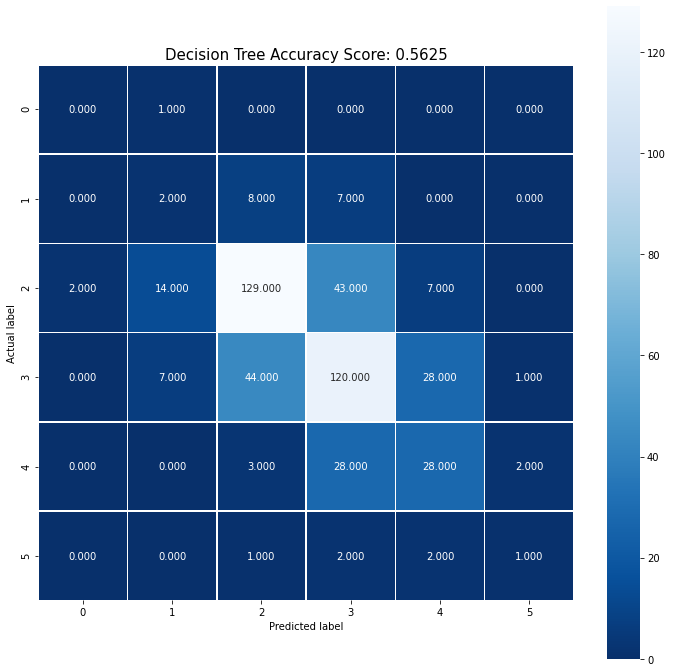

In [29]:
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Blues_r");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Decision Tree Accuracy Score: {0}".format(tree_score);
plt.title(title, size = 15);

In [30]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

In [31]:
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

Accuracy: 0.5416666666666666
Report:               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.12      0.12      0.12        17
           5       0.68      0.62      0.65       195
           6       0.52      0.54      0.53       200
           7       0.40      0.49      0.44        61
           8       0.00      0.00      0.00         6

    accuracy                           0.54       480
   macro avg       0.29      0.29      0.29       480
weighted avg       0.55      0.54      0.54       480



In [32]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

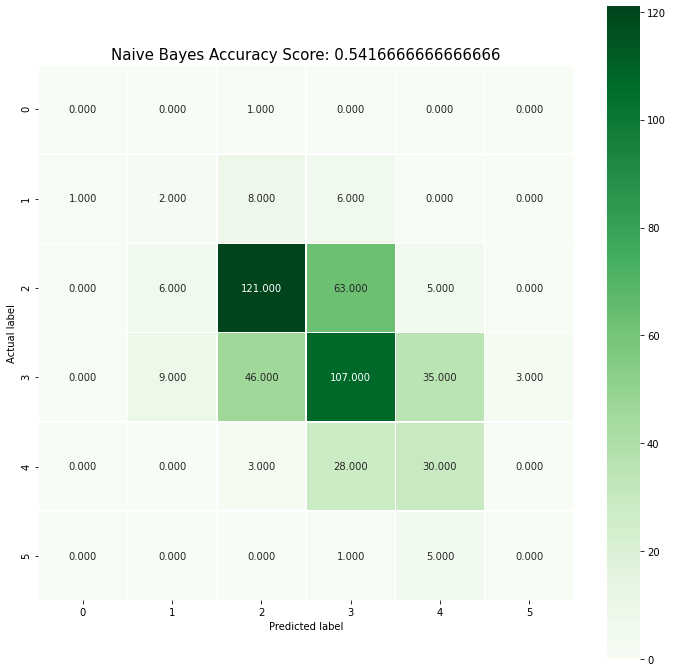

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = "Greens");
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = "Naive Bayes Accuracy Score: {0}".format(bayes_score);
plt.title(title, size = 15);

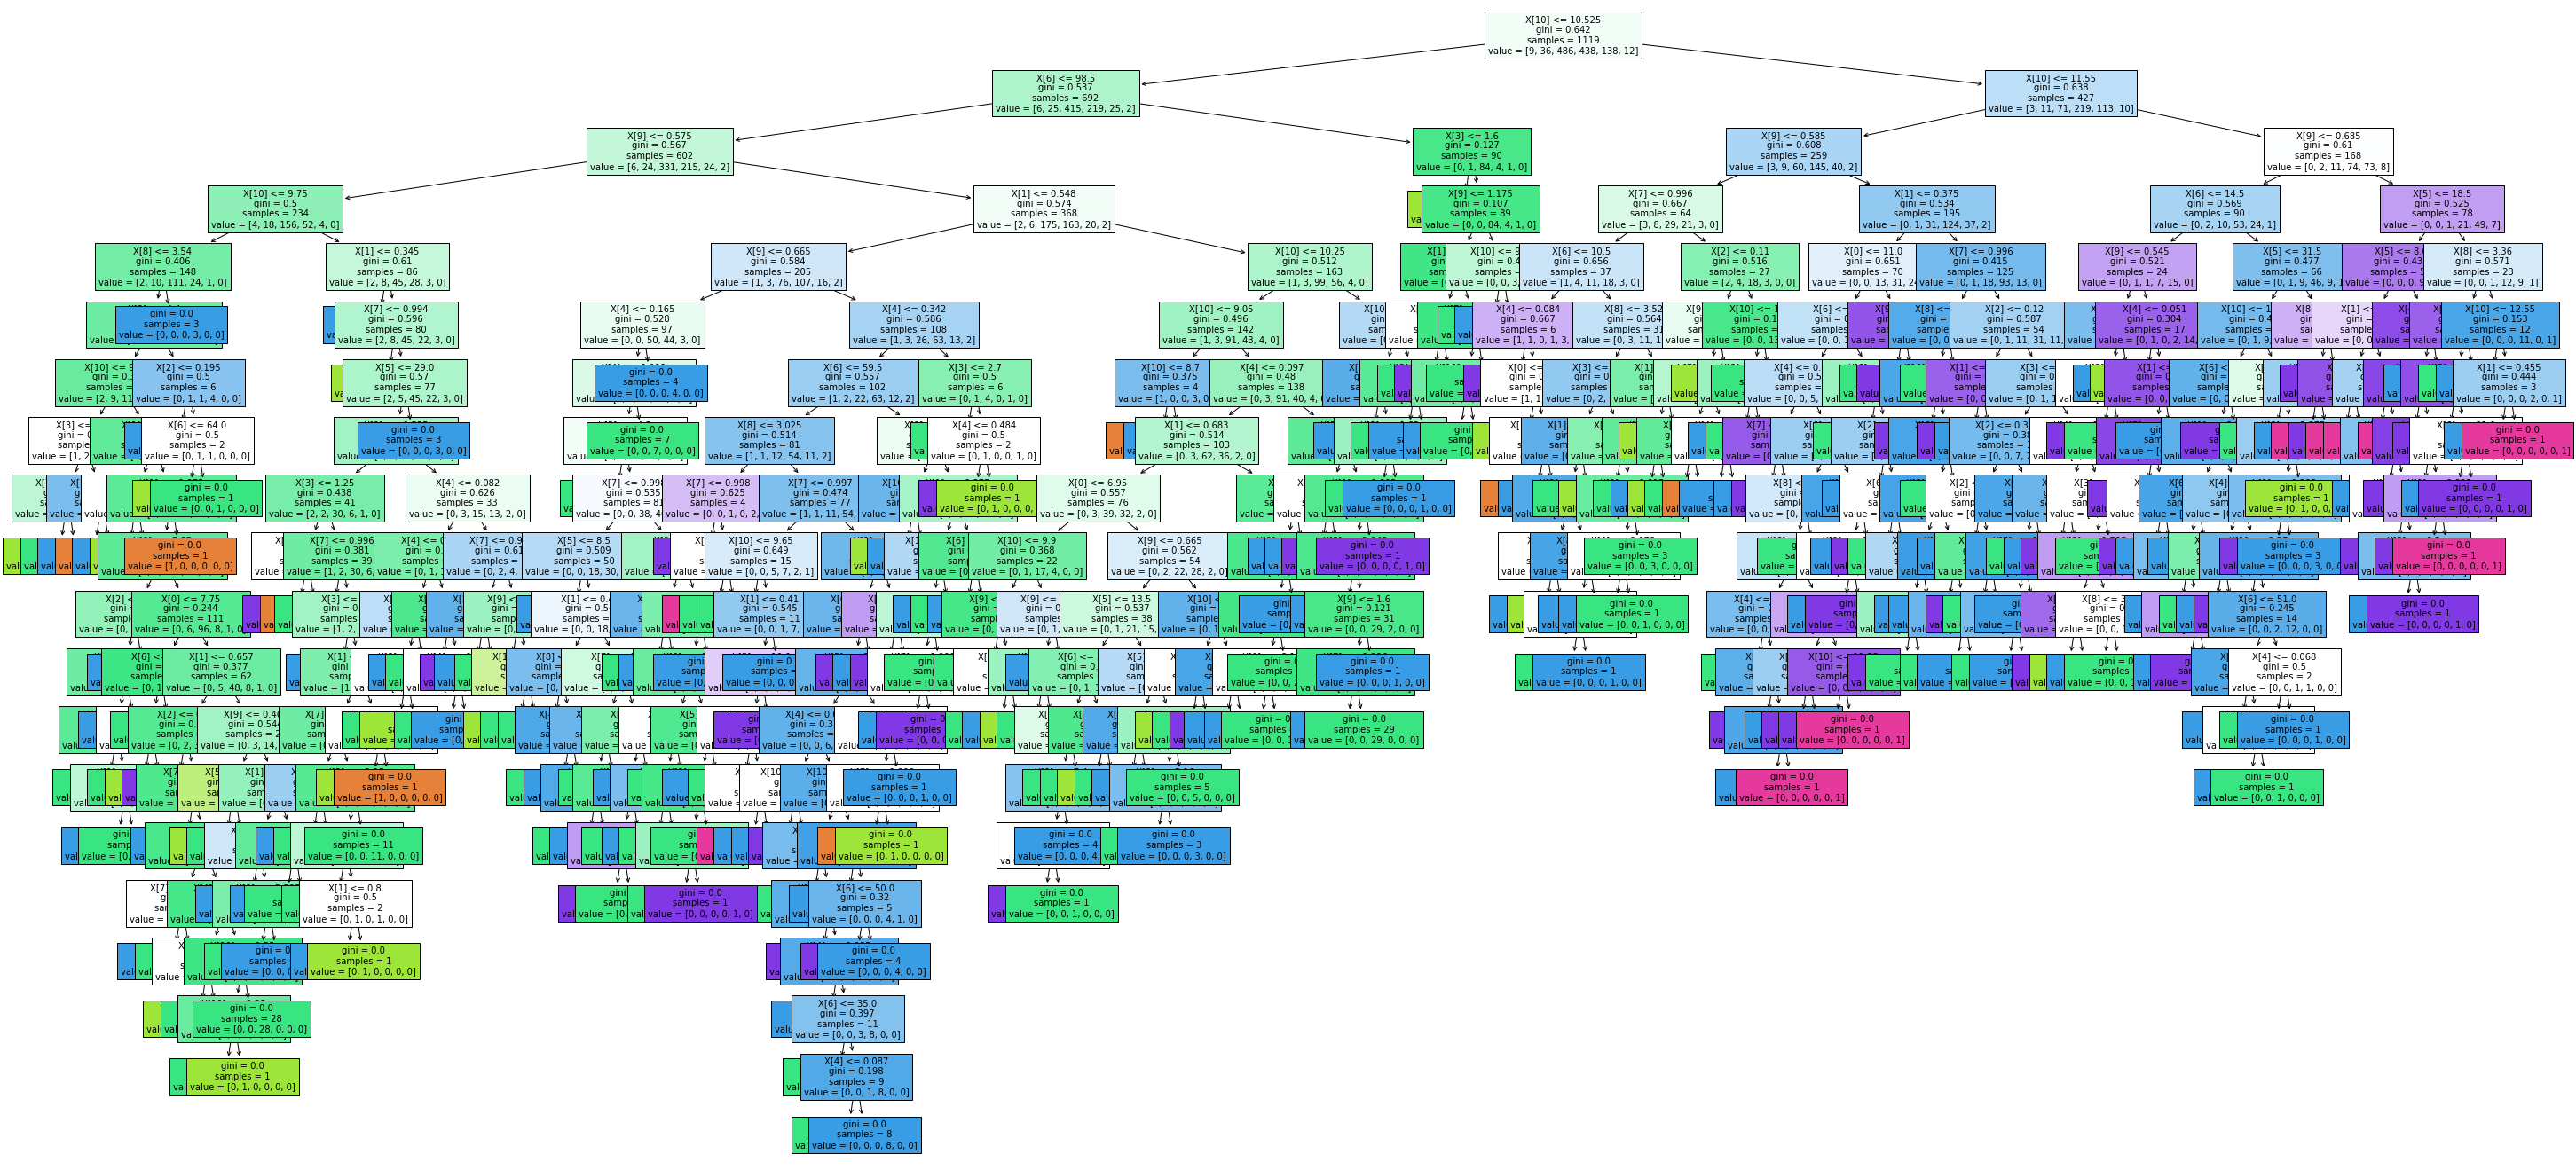

In [36]:
fig, ax = plt.subplots(figsize = (50,24))
tree.plot_tree(clf, filled = True, fontsize = 10)
plt.savefig('decision_tree_wine', dpi=100)

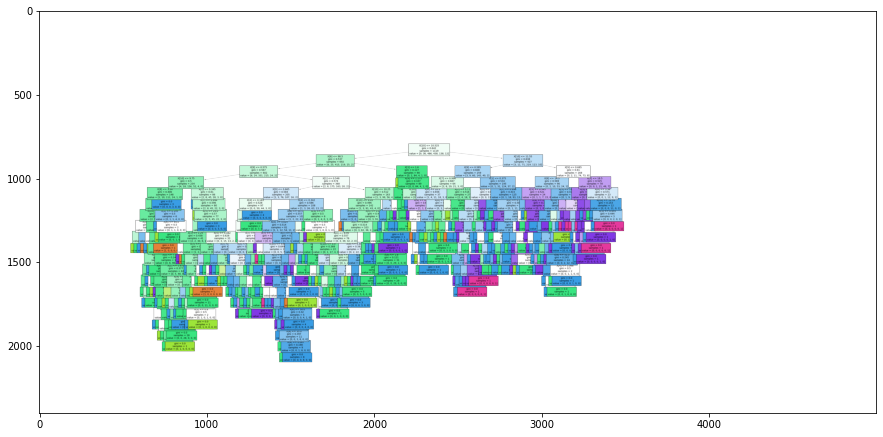

In [37]:
import imageio
pic = imageio.imread('decision_tree_wine.png')
plt.figure(figsize = (15,15))
 
plt.imshow(pic)